In [42]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
import io
df2 = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Saving test.csv to test (1).csv


In [43]:
df2.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of Joining       12250 non-null  object 
 1   Gender                12250 non-null  object 
 2   Company Type          12250 non-null  object 
 3   WFH Setup Available   12250 non-null  object 
 4   Designation           12250 non-null  int64  
 5   Resource Allocation   12250 non-null  int64  
 6   Mental Fatigue Score  12250 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 670.0+ KB


In [ ]:
# Removing Employee ID it is not a useable metric.
df2 = df2.drop("Employee ID", axis='columns')

In [23]:
# Removing Date, All entries are from the same year.
df2 = df2.drop("Date of Joining", axis='columns')

In [9]:
df2.describe()

,Designation,Resource Allocation,Mental Fatigue Score
count,12250.000000,12250.000000,12250.000000
mean,2.175265,4.458857,5.720571
std,1.132885,2.045602,1.914063
min,0.000000,1.000000,0.000000
25%,1.000000,3.000000,4.500000
50%,2.000000,4.000000,5.900000
75%,3.000000,6.000000,7.100000
max,5.000000,10.000000,10.000000


In [31]:
df2.nunique()

Gender                    2
Company Type              2
WFH Setup Available       2
Designation               6
Resource Allocation      10
Mental Fatigue Score    101
dtype: int64

In [40]:
df2['Gender'].value_counts()

Female    6445
Male      5805
Name: Gender, dtype: int64

In [41]:
df2['WFH Setup Available'].value_counts()

Yes    6638
No     5612
Name: WFH Setup Available, dtype: int64

  ## Questions for this Data:

   Who is the most Fatigued? 

   Who is least fatigued?

   What conditions of these two groups can be used to help the other?

<Axes: xlabel='Designation', ylabel='Resource Allocation'>

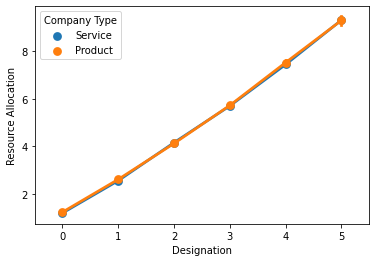

In [29]:
sns.pointplot(x = 'Designation', y = 'Resource Allocation', hue = 'Company Type', data = df2)

### Work Type
**Q**: There are two job type listed, are there any major difference in work structure between the two?

**A**: Each Designation, recieves the nearly the same Resource Allocation regaurdless of Company Type

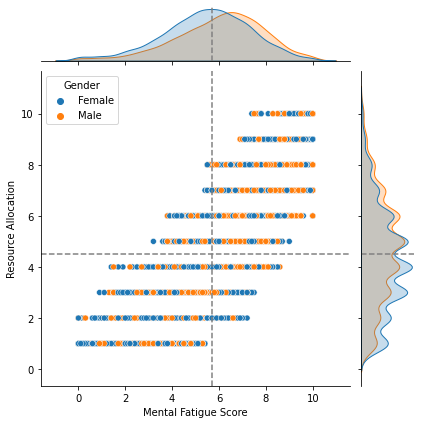

In [12]:
g = sns.jointplot(data = df2, x = 'Mental Fatigue Score', y = 'Resource Allocation', hue ='Gender')
g.refline(x=5.7, y=4.5)

## Gender
**Q**: There are two genders listed in this data set, does gender affect Mental Fatigue Score?

**A**: Increasing Resources Allocated one STD concentrates Mental Fatigue Scores above the mean, with a greater representation of Males in this quadrant.

**A2**: Females compared to Males score lower in Resource Allocation and Mental Fatigue Score.

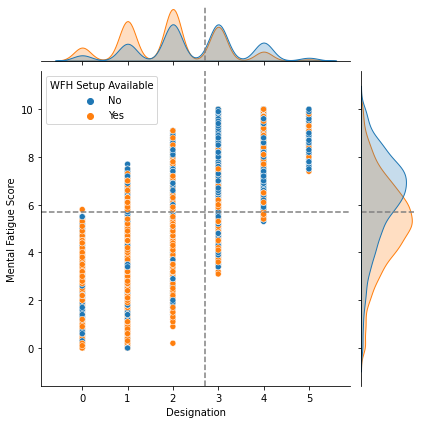

In [45]:
t = sns.jointplot(data = df2, x = 'Designation', y = 'Mental Fatigue Score', hue = 'WFH Setup Available')
t.refline(x =2.7, y =5.7 )

## WFH Setup Available

**Q**: There might incrase or decrease mental fatigue?

**A**:Not having a WFH Setup Available is much less liklely with a higher Designation and higher Fatigue Score and the same is true of the inverse.

###Summary of Findings

1: Men compared to women score higher in Fatigue Score

2: Women as a group have less Resources Allocated

3: Higher Designations have concentrated Fatigue Scores

4: Those with lower Mental Fatigue Scores, have lower Resource Allocation lower Designation, more WFH Setup Available, and tend to be Female

-1: Work type is not a factor.

-2: Date of Joining was all within a year and was not relavant to this dataset.

# How to reduce overal fatigue of sample population: 

First: Make WFH Setup Avialable to more employees in Designation 3,4 and 5. Adressing this group with have the largest impact

Second: Look into work place equity of Resource Allocated between Males and Females.